${\bf Exercice 1  https://chat.geekgpt.org/}$





In [1]:
print(4+0.0001-4)
print(4-4+0.0001)

9.999999999976694e-05
0.0001


Nous n'avons pas la commutativité pour la soustraction.

In [2]:
x=10**29
y=10**(-9)
print(((y+x)-x)/y)
print((y+(x-x))/y)

0.0
1.0


On n'a pas l'associativité. On additionne des nombres de grandeurs différentes.

In [3]:
##print(10**(309)/(9.9)**(309))
print((10/9.9)**(309))

22.321576767696584


Dans le premier calcul on a un dépassement de capacité. Alors que si on effectue d'abord le
rapport avant d'élever à la puissance, il n y a pas de problème.

${\bf Exercice 2}$






In [4]:
a = bin(34)[2:] #afin de ne pas avoir la notation 0b qui apparait à chaque fois
b = bin(27)[2:]
print("a en binaire :", a)
print("b en binaire :", b)


c = bin(int(a, 2) + int(b, 2))[2:]
cdecimal = int(c, 2)


print("c en binaire :", c)
print("c en décimal :", cdecimal)


a en binaire : 100010
b en binaire : 11011
c en binaire : 111101
c en décimal : 61


${\bf Exercice 3}$






In [5]:
epsilon=1;
while epsilon+1>1:
    epsilon=epsilon/2

epsilon=2*epsilon
print("epsilon machine:", epsilon)

epsilon machine: 2.220446049250313e-16


Les valeurs de l'epsilon machine sous python en double et simple précision sont obtenues de la façon suivante:

In [6]:
import numpy as np

print(np.finfo(float).eps)
print(np.finfo(np.float32).eps)

2.220446049250313e-16
1.1920929e-07


Si l'on veut améliorer l'algorithme précédent afin de pouvoir le tester en simple et double précision:

In [7]:
def Epsilon(func=float):
    EM = func(1)
    while func(1)+func(EM) != func(1):
        EM = func(EM) / func(2)

    EM=func(2)*func(EM)
    return EM

In [8]:
import numpy
Epsilon(numpy.float64)

2.220446049250313e-16

In [9]:
Epsilon(numpy.float32)

1.1920929e-07

In [10]:
import sys

sys.float_info.min

2.2250738585072014e-308

renvoie la valeur positive minimale pouvant être représentée en
double précision.

${\bf Exercice 4}$









In [11]:
import matplotlib.pyplot as plt

x=np.linspace(1-2*10**(-4),1+2*10**(-4),1000)
plt.plot(x,(x-1)**7) # graphe de (x-1)**7
plt.show()

ModuleNotFoundError: No module named 'matplotlib'

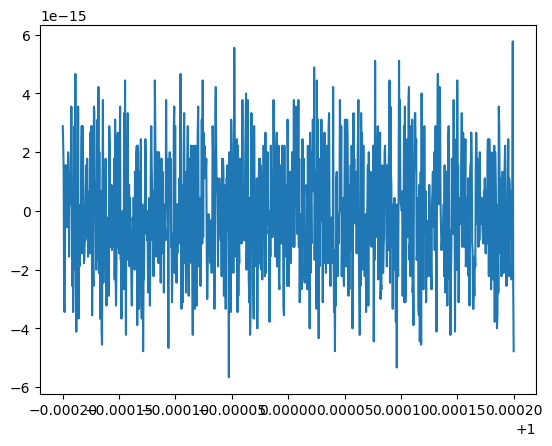

In [ ]:
p = [1, -7, 21, -35, 35, -21, 7, -1]
poly=np.polyval(p,x)
plt.plot(x,poly)
plt.show()

On a une accumulation catastrophique des erreurs d'arrondi. On le voit bien sur les
graphiques et aussi dans le calcul des racines. On devrait obtenir 7 fois la racine 1. Alors qu'on obtient:

In [ ]:
np.roots(p)

array([1.00936763+0.j        , 1.00585642+0.00732112j,
       1.00585642-0.00732112j, 0.99792582+0.00915815j,
       0.99792582-0.00915815j, 0.99153395+0.00408409j,
       0.99153395-0.00408409j])

${\bf Exercice 5}$











In [ ]:
a=1
b=3000.001
c=3
x1=(-b+np.sqrt(b**2-4*a*c))/(2*a)
x2=(-b-np.sqrt(b**2-4*a*c))/(2*a)
print("le calcul direct des racines donne:", x1, "et", x2)
print("avec roots, les racines sont:", np.roots([a, b, c]))


le calcul direct des racines donne: -0.0009999999999763531 et -3000.0
avec roots, les racines sont: [-3.e+03 -1.e-03]


Les racines exactes sont
$x_1 = -0,001$ et $x_2 = -3000$. Pour le calcul de la première racine qui pose problème, l'opération revient à soustraire des nombres très voisins.

Pour éviter
cela, on peut multiplier $x_1$ par son conjugué et calculer :
$$R_1=\frac{-b+\sqrt{b^2-4ac}}{2a}\frac{-b-\sqrt{b^2-4ac}}{-b-\sqrt{b^2-4ac}}=\frac{-2c}{b+\sqrt{b^2-4ac}}$$
On peut également utiliser le fait  que le produit des racines vaut $c/a$.

In [ ]:
print(c/(a*x2))
print((-2*c)/(b+np.sqrt(b**2-4*a*c)))

-0.001
-0.001
